In [3334]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score,classification_report,precision_score,recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import KFold,cross_val_score, RepeatedStratifiedKFold,StratifiedKFold
from sklearn.preprocessing import OneHotEncoder,StandardScaler,PowerTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from statistics import mean, stdev
from sklearn import preprocessing
from sklearn.model_selection import StratifiedKFold
from sklearn import linear_model

In [3335]:
df_dataset = pd.read_csv("heart_disease_uci.csv")
df_dataset

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0


In [3336]:
df_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [3337]:
df = df_dataset.drop('id', axis=1)

In [3338]:
perc = [.01, .05, .25, .5, .95, .99]
df.describe(perc).T

,count,mean,std,min,1%,5%,25%,50%,95%,99%,max
age,920.0,53.510870,9.424685,28.0,32.000,37.0,47.0,54.0,68.0,74.00,77.0
trestbps,861.0,132.132404,19.066070,0.0,95.000,105.0,120.0,130.0,160.0,180.00,200.0
chol,890.0,199.130337,110.780810,0.0,0.000,0.0,175.0,223.0,334.1,412.55,603.0
thalch,865.0,137.545665,25.926276,60.0,75.560,95.0,120.0,140.0,178.0,186.36,202.0
oldpeak,858.0,0.878788,1.091226,-2.6,-0.586,0.0,0.0,0.5,3.0,4.00,6.2
ca,309.0,0.676375,0.935653,0.0,0.000,0.0,0.0,0.0,3.0,3.00,3.0
num,920.0,0.995652,1.142693,0.0,0.000,0.0,0.0,1.0,3.0,4.00,4.0


In [3339]:
round(df.describe(exclude = ['float', 'int64']),2)

,sex,dataset,cp,fbs,restecg,exang,slope,thal
count,920,920,920,830,918,865,611,434
unique,2,4,4,2,3,2,3,3
top,Male,Cleveland,asymptomatic,False,normal,False,flat,normal
freq,726,304,496,692,551,528,345,196


#### Missing Values

In [3340]:
df.isnull().sum()

age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [3341]:
df['trestbps'] = df['trestbps'].fillna(round(df_dataset['trestbps'].median(), 2))
df['chol'] = df['chol'].fillna(round(df_dataset['chol'].median(), 2))
df['thalch'] = df['thalch'].fillna(round(df_dataset['thalch'].median(), 2))
df['oldpeak'] = df['oldpeak'].fillna(round(df_dataset['oldpeak'].median(), 2))
df['ca'] = df['ca'].fillna(round(df_dataset['ca'].median(), 2))

In [3342]:
df['fbs'] = df['fbs'].fillna(df['fbs'].mode()[0])
df['restecg'] = df['restecg'].fillna(df['restecg'].mode()[0])
df['exang'] = df['exang'].fillna(df['exang'].mode()[0])
df['slope'] = df['slope'].fillna(df['slope'].mode()[0])
df['thal'] = df['thal'].fillna(df['thal'].mode()[0])

In [3343]:
df.isnull().sum()

age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [3344]:
df

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,flat,0.0,normal,1
916,62,Male,VA Long Beach,typical angina,130.0,139.0,False,st-t abnormality,140.0,False,0.5,flat,0.0,normal,0
917,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,flat,0.0,fixed defect,2
918,58,Male,VA Long Beach,asymptomatic,130.0,385.0,True,lv hypertrophy,140.0,False,0.5,flat,0.0,normal,0


#### Outliers

In [3345]:
def grabColNames(dataframe, catTh=10, carTh=20):
    catCols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    numButCat = [col for col in dataframe.columns if dataframe[col].nunique() < catTh and
                dataframe[col].dtypes != "O"]
    catButCar = [col for col in dataframe.columns if dataframe[col].nunique() > carTh and
                dataframe[col].dtypes == "O"]
    catCols = catCols + numButCat
    catCols = [col for col in catCols if col not in catButCar]

    # numCols
    numCols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    numCols = [col for col in numCols if col not in numButCat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'catCols: {len(catCols)}')
    print(f'numCols: {len(numCols)}')
    print(f'catButCar: {len(catButCar)}')
    print(f'numButCat: {len(numButCat)}')
    return catCols, numCols, catButCar, numButCat


catCols, numCols, catButCar, numButCat = grabColNames(df)
numCols = [col for col in numCols if col not in "id"]

Observations: 920
Variables: 15
catCols: 10
numCols: 5
catButCar: 0
numButCat: 4


In [3346]:
def outlierThresholds(dataframe, colName, q1=0.25, q3=0.75):
    quartile1 = dataframe[colName].quantile(q1)
    quartile3 = dataframe[colName].quantile(q3)
    interquantileRange = quartile3 - quartile1
    upLimit = quartile3 + 1.5 * interquantileRange
    lowLimit = quartile1 - 1.5 * interquantileRange
    return lowLimit, upLimit

In [3347]:
def checkOutlier(dataframe, colName):
    lowLimit, upLimit = outlierThresholds(dataframe, colName)
    if dataframe[(dataframe[colName] > upLimit) | (dataframe[colName] < lowLimit)].any(axis=None):
        return True
    else:
        return False

print("Age: Low limit, up limit",outlierThresholds(df, "age"))
print("Trestbps: Low limit, up limit",outlierThresholds(df, "trestbps"))
print("Chol: Low limit, up limit",outlierThresholds(df, "chol"))
print("Thalch: Low limit, up limit",outlierThresholds(df, "thalch"))
print("Oldpeak: Low limit, up limit",outlierThresholds(df, "oldpeak"))
print("Ca: Low limit, up limit",outlierThresholds(df, "ca"))

Age: Low limit, up limit (27.5, 79.5)
Trestbps: Low limit, up limit (90.0, 170.0)
Chol: Low limit, up limit (43.875, 400.875)
Thalch: Low limit, up limit (66.0, 210.0)
Oldpeak: Low limit, up limit (-2.25, 3.75)
Ca: Low limit, up limit (0.0, 0.0)


In [3348]:
for col in numCols:
    print(col, checkOutlier(df, col))

age False
trestbps True
chol True
thalch True
oldpeak True


In [3349]:
def replace_with_thresholds(dataframe, variable):
    lowLimit, upLimit = outlierThresholds(dataframe, variable)                           
    dataframe.loc[(dataframe[variable] > upLimit), variable] = upLimit
    dataframe.loc[(dataframe[variable] < lowLimit), variable] = lowLimit                                        

for col in numCols:
    print(col, checkOutlier(df_dataset, col))                      # Outlier var mi diye sorduk.

for col in numCols:
    replace_with_thresholds(df_dataset, col)                        # Esik degerler ile degistirdik.

for col in numCols:
    print(col, checkOutlier(df_dataset, col)) 

age False
trestbps True
chol True
thalch True
oldpeak True
age False
trestbps False
chol False
thalch False
oldpeak False


#### AGE

NaN Values: 0
50


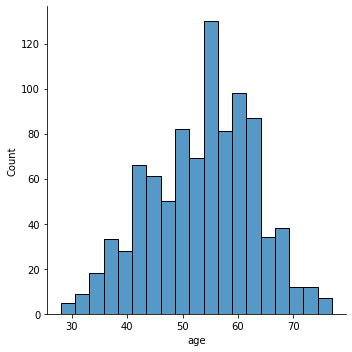

In [3350]:
print("NaN Values:",df['age'].isna().sum())
print(df['age'].nunique())

sns.displot(df['age'])

<AxesSubplot:xlabel='num', ylabel='age'>

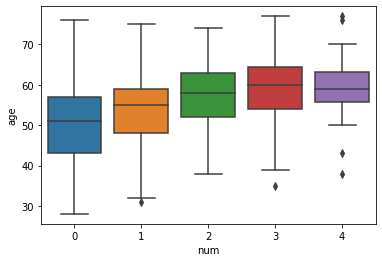

In [3351]:
sns.boxplot(data=df,x='num',y='age')

#### SEX

NaN Values: 0
Unique values
 ['Male' 'Female']
Value Counts
 Male      726
Female    194
Name: sex, dtype: int64


<AxesSubplot:xlabel='sex', ylabel='count'>

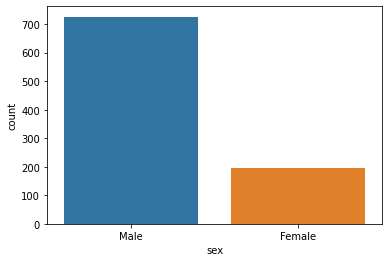

In [3352]:
print("NaN Values:",df['sex'].isna().sum())
print('Unique values\n',df['sex'].unique())
print('Value Counts\n',df['sex'].value_counts())

sns.countplot(data=df,x='sex')

<AxesSubplot:xlabel='sex', ylabel='count'>

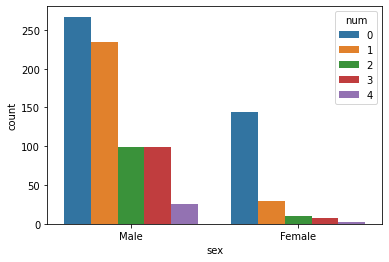

In [3353]:
sns.countplot(data=df,x='sex',hue='num')

#### DATASET

NaN Values: 0
Unique values
 ['Cleveland' 'Hungary' 'Switzerland' 'VA Long Beach']
Value Counts
 Cleveland        304
Hungary          293
VA Long Beach    200
Switzerland      123
Name: dataset, dtype: int64


<AxesSubplot:xlabel='dataset', ylabel='count'>

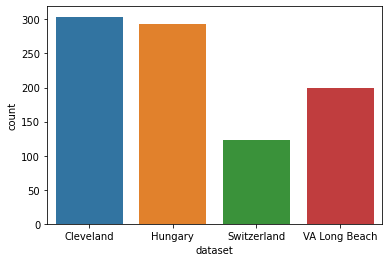

In [3354]:
print("NaN Values:",df['dataset'].isna().sum())
print('Unique values\n',df['dataset'].unique())
print('Value Counts\n',df['dataset'].value_counts())

sns.countplot(data=df,x='dataset')

<AxesSubplot:xlabel='dataset', ylabel='count'>

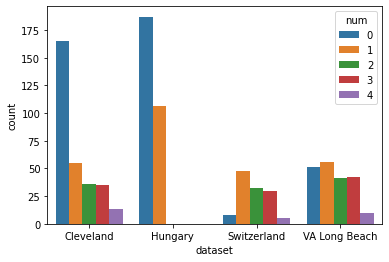

In [3355]:
sns.countplot(data=df,x='dataset',hue='num')

#### CP

NaN Values: 0
Unique values
 ['typical angina' 'asymptomatic' 'non-anginal' 'atypical angina']
Value Counts
 asymptomatic       496
non-anginal        204
atypical angina    174
typical angina      46
Name: cp, dtype: int64


<AxesSubplot:xlabel='cp', ylabel='count'>

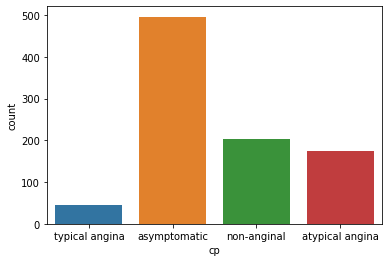

In [3356]:
print("NaN Values:",df['cp'].isna().sum())
print('Unique values\n',df['cp'].unique())
print('Value Counts\n',df['cp'].value_counts())

sns.countplot(data=df,x='cp')

<AxesSubplot:xlabel='cp', ylabel='count'>

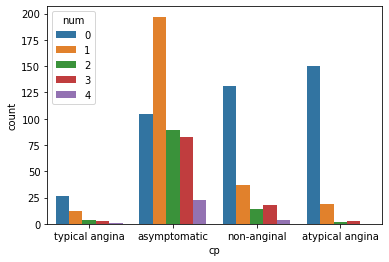

In [3357]:
sns.countplot(data=df,x='cp',hue='num')

#### TRESTBPS

NaN Values: 0
61


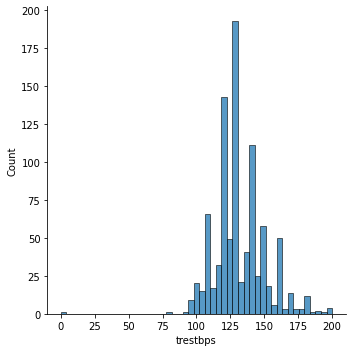

In [3358]:
print("NaN Values:",df['trestbps'].isna().sum())
print(df['trestbps'].nunique())

sns.displot(df['trestbps'])

<AxesSubplot:xlabel='num', ylabel='trestbps'>

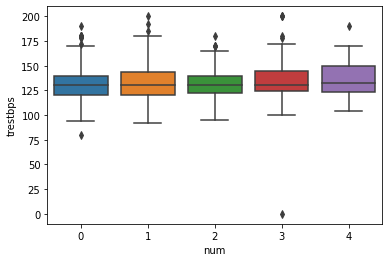

In [3359]:
sns.boxplot(data=df,x='num',y='trestbps')

In [3360]:
replace_with_thresholds(df, "trestbps") 

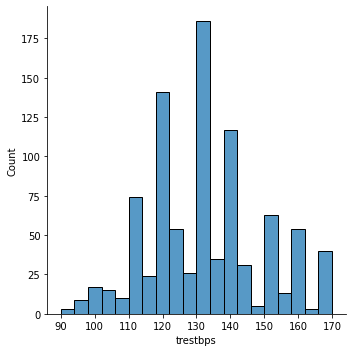

In [3361]:
sns.displot(df['trestbps'])

<AxesSubplot:xlabel='num', ylabel='trestbps'>

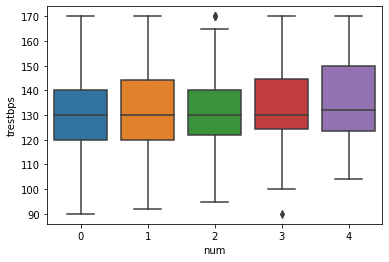

In [3362]:
sns.boxplot(data=df,x='num',y='trestbps')

#### CHOL

NaN Values: 0
217


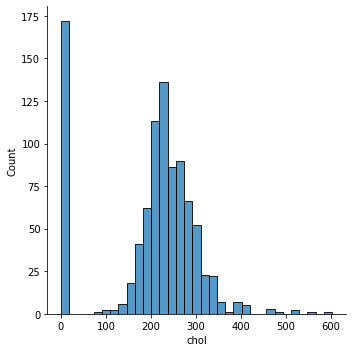

In [3363]:
print("NaN Values:",df['chol'].isna().sum())
print(df['chol'].nunique())

sns.displot(df['chol'])

<AxesSubplot:xlabel='num', ylabel='chol'>

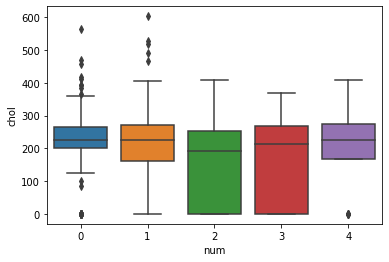

In [3364]:
sns.boxplot(data=df,x='num',y='chol')

In [3365]:
replace_with_thresholds(df, "chol") 

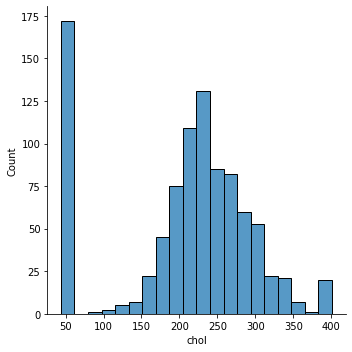

In [3366]:
sns.displot(df['chol'])

<AxesSubplot:xlabel='num', ylabel='chol'>

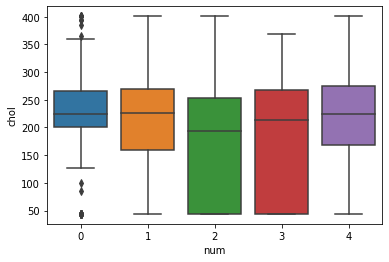

In [3367]:
sns.boxplot(data=df,x='num',y='chol')

#### FBS

NaN Values: 0
Unique values
 [ True False]
Value Counts
 False    782
True     138
Name: fbs, dtype: int64


<AxesSubplot:xlabel='fbs', ylabel='count'>

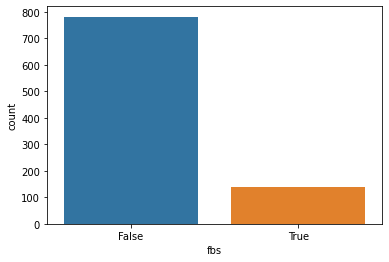

In [3368]:
print("NaN Values:",df['fbs'].isna().sum())
print('Unique values\n',df['fbs'].unique())
print('Value Counts\n',df['fbs'].value_counts())

sns.countplot(data=df,x='fbs')

<AxesSubplot:xlabel='fbs', ylabel='count'>

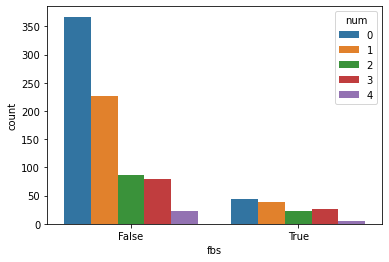

In [3369]:
sns.countplot(data=df,x='fbs',hue='num')

#### RESTECG

NaN Values: 0
Unique values
 ['lv hypertrophy' 'normal' 'st-t abnormality']
Value Counts
 normal              553
lv hypertrophy      188
st-t abnormality    179
Name: restecg, dtype: int64


<AxesSubplot:xlabel='restecg', ylabel='count'>

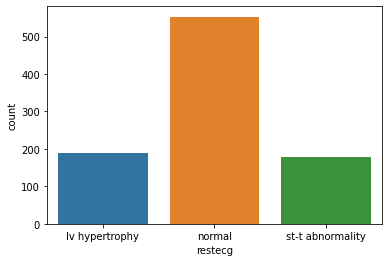

In [3370]:
print("NaN Values:",df['restecg'].isna().sum())
print('Unique values\n',df['restecg'].unique())
print('Value Counts\n',df['restecg'].value_counts())

sns.countplot(data=df,x='restecg')

<AxesSubplot:xlabel='restecg', ylabel='count'>

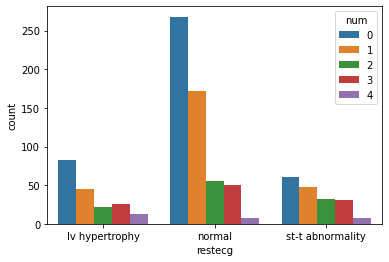

In [3371]:
sns.countplot(data=df,x='restecg',hue='num')

#### THALCH

NaN Values: 0
119


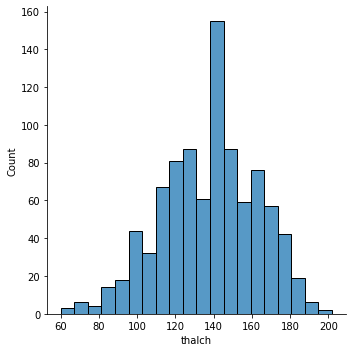

In [3372]:
print("NaN Values:",df['thalch'].isna().sum())
print(df['thalch'].nunique())

sns.displot(df['thalch'])

<AxesSubplot:xlabel='num', ylabel='thalch'>

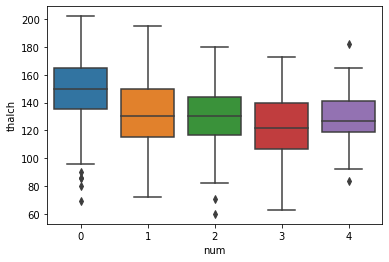

In [3373]:
sns.boxplot(data=df,x='num',y='thalch')

In [3374]:
replace_with_thresholds(df, "thalch")

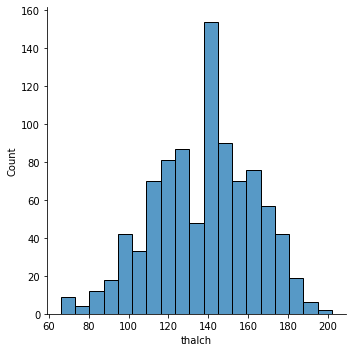

In [3375]:
sns.displot(df['thalch'])

<AxesSubplot:xlabel='num', ylabel='thalch'>

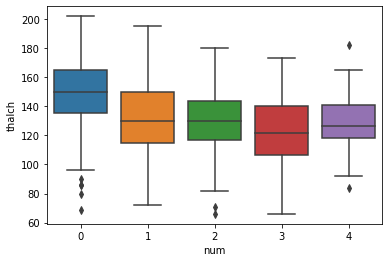

In [3376]:
sns.boxplot(data=df,x='num',y='thalch')

#### EXANG

NaN Values: 0
Unique Values
 [False  True]
Value Counts
 False    583
True     337
Name: exang, dtype: int64


<AxesSubplot:xlabel='exang', ylabel='count'>

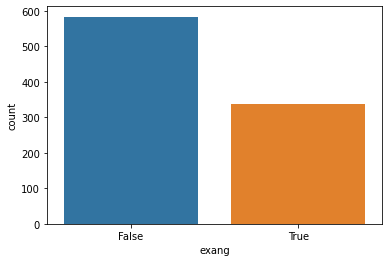

In [3377]:
print("NaN Values:",df['exang'].isna().sum())
print('Unique Values\n',df['exang'].unique())
print("Value Counts\n",df['exang'].value_counts())

sns.countplot(data=df,x='exang')

<AxesSubplot:xlabel='exang', ylabel='count'>

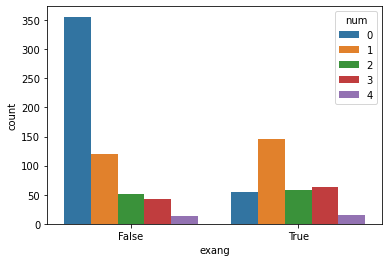

In [3378]:
sns.countplot(data=df,x='exang',hue='num')

#### OLDPEAK

NaN Values: 0
53


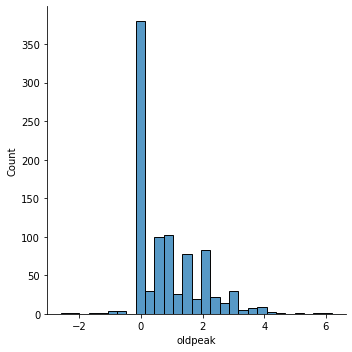

In [3379]:
print("NaN Values:",df['oldpeak'].isna().sum())
print(df['oldpeak'].nunique())

sns.displot(df['oldpeak'])

<AxesSubplot:xlabel='num', ylabel='oldpeak'>

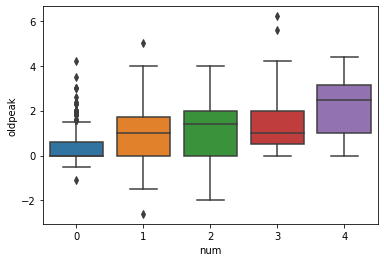

In [3380]:
sns.boxplot(data=df,x='num',y='oldpeak')

In [3381]:
replace_with_thresholds(df, "oldpeak")

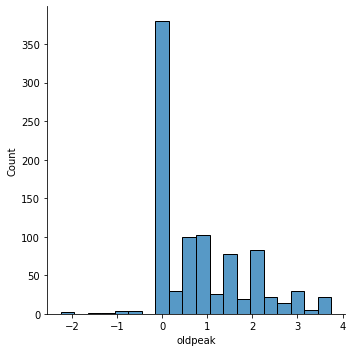

In [3382]:
sns.displot(df['oldpeak'])

<AxesSubplot:xlabel='num', ylabel='oldpeak'>

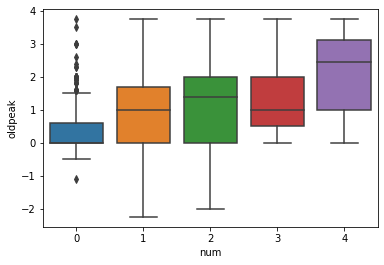

In [3383]:
sns.boxplot(data=df,x='num',y='oldpeak')

#### SLOPE

NaN Values: 0
Unique Values
 ['downsloping' 'flat' 'upsloping']
Value Counts
 flat           654
upsloping      203
downsloping     63
Name: slope, dtype: int64


<AxesSubplot:xlabel='slope', ylabel='count'>

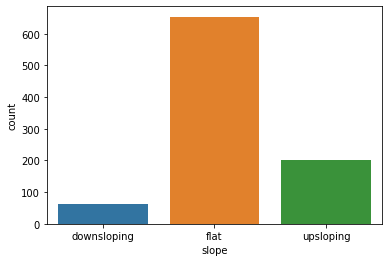

In [3384]:
print("NaN Values:",df['slope'].isna().sum())
print('Unique Values\n',df['slope'].unique())
print("Value Counts\n",df['slope'].value_counts())

sns.countplot(data=df,x='slope')

<AxesSubplot:xlabel='slope', ylabel='count'>

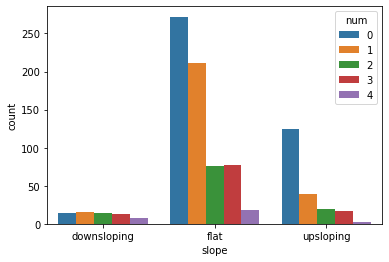

In [3385]:
sns.countplot(data=df,x='slope',hue='num')

#### CA

NaN Values: 0
4


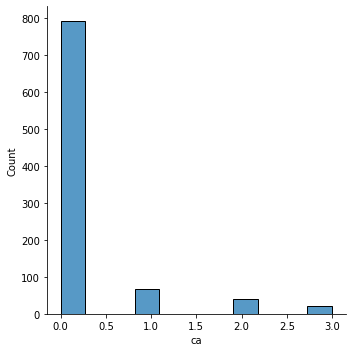

In [3386]:
print("NaN Values:",df['ca'].isna().sum())
print(df['ca'].nunique())
sns.displot(df['ca'])

<AxesSubplot:xlabel='num', ylabel='ca'>

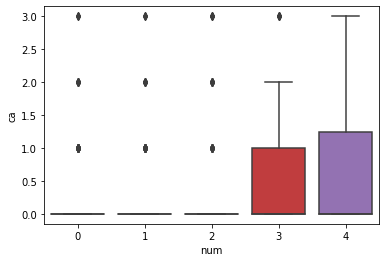

In [3387]:
sns.boxplot(data=df,x='num',y='ca')

#### THAL

NaN Values: 0
Unique Values
 ['fixed defect' 'normal' 'reversable defect']
Value Counts
 normal               682
reversable defect    192
fixed defect          46
Name: thal, dtype: int64


<AxesSubplot:xlabel='thal', ylabel='count'>

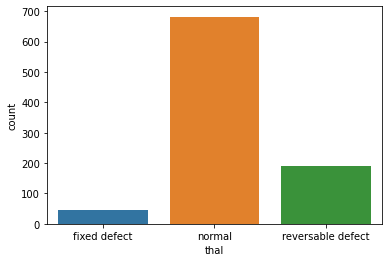

In [3388]:
print("NaN Values:",df['thal'].isna().sum())
print('Unique Values\n',df['thal'].unique())
print("Value Counts\n",df['thal'].value_counts())

sns.countplot(data=df,x='thal')

<AxesSubplot:xlabel='thal', ylabel='count'>

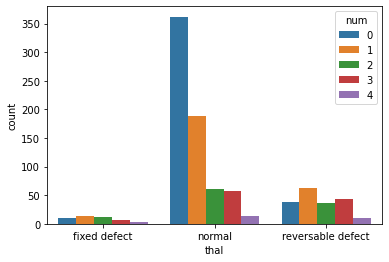

In [3389]:
sns.countplot(data=df,x='thal',hue='num')

#### NUM

NaN Values: 0
Unique Value
 [0 2 1 3 4]
Value Counts
 0    411
1    265
2    109
3    107
4     28
Name: num, dtype: int64


<AxesSubplot:xlabel='num', ylabel='count'>

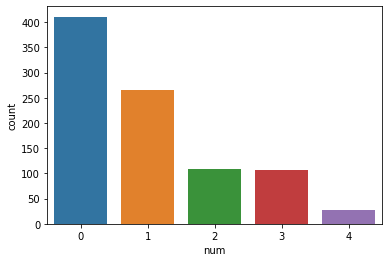

In [3390]:
print("NaN Values:",df['num'].isna().sum())
print('Unique Value\n',df['num'].unique())
print('Value Counts\n',df['num'].value_counts())

sns.countplot(data=df,x='num')

In [3391]:
#df['num'].replace({2:1,3:1, 4:1}, inplace = True)

In [3392]:
df

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,flat,0.0,normal,1
916,62,Male,VA Long Beach,typical angina,130.0,139.0,False,st-t abnormality,140.0,False,0.5,flat,0.0,normal,0
917,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,flat,0.0,fixed defect,2
918,58,Male,VA Long Beach,asymptomatic,130.0,385.0,True,lv hypertrophy,140.0,False,0.5,flat,0.0,normal,0


### FEATURE ENGINEERING
 #### Label Encoding

In [3393]:
cols=df.select_dtypes(include=['object']).columns
print(cols)

Index(['sex', 'dataset', 'cp', 'restecg', 'slope', 'thal'], dtype='object')


In [3394]:
df['fbs'] = df['fbs'].replace({'True':1,'False':0}).astype(np.uint8)
df['exang'] = df['exang'].replace({'True':1,'False':0}).astype(np.uint8)
df['ca'] = df['ca'].astype(int)

In [3395]:
le=LabelEncoder()
df[cols]=df[cols].apply(le.fit_transform)
df.head(10)

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,1,0,3,145.0,233.0,1,0,150.0,0,2.3,0,0,0,0
1,67,1,0,0,160.0,286.0,0,0,108.0,1,1.5,1,3,1,2
2,67,1,0,0,120.0,229.0,0,0,129.0,1,2.6,1,2,2,1
3,37,1,0,2,130.0,250.0,0,1,187.0,0,3.5,0,0,1,0
4,41,0,0,1,130.0,204.0,0,0,172.0,0,1.4,2,0,1,0
5,56,1,0,1,120.0,236.0,0,1,178.0,0,0.8,2,0,1,0
6,62,0,0,0,140.0,268.0,0,0,160.0,0,3.6,0,2,1,3
7,57,0,0,0,120.0,354.0,0,1,163.0,1,0.6,2,0,1,0
8,63,1,0,0,130.0,254.0,0,0,147.0,0,1.4,1,1,2,2
9,53,1,0,0,140.0,203.0,1,0,155.0,1,3.1,0,0,2,1


<AxesSubplot:>

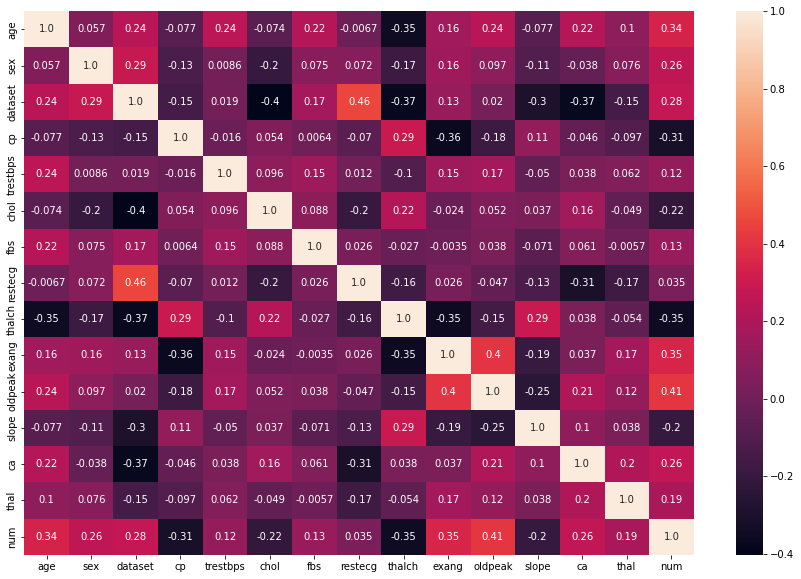

In [3396]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,fmt='.2')

In [3397]:
classifier = SelectKBest(score_func=f_classif,k=5)
fits = classifier.fit(df.drop('num',axis=1),df['num'])
x=pd.DataFrame(fits.scores_)
columns = pd.DataFrame(df.drop('num',axis=1).columns)
fscores = pd.concat([columns,x],axis=1)
fscores.columns = ['Attribute','Score']
fscores.sort_values(by='Score',ascending=False)

,Attribute,Score
9,exang,53.425924
10,oldpeak,50.770359
8,thalch,42.152053
3,cp,40.165237
0,age,31.226059
2,dataset,25.088254
1,sex,24.112502
12,ca,18.313573
5,chol,16.235279
11,slope,11.587538


In [3398]:
cols=fscores[fscores['Score']>20]['Attribute']
print(cols)

0         age
1         sex
2     dataset
3          cp
8      thalch
9       exang
10    oldpeak
Name: Attribute, dtype: object


#### SPLITTING DATA

In [3399]:
x = df.drop('num', axis=1)
target = "num"
y = df[target].values

feature_col=df.columns.to_list()
feature_col.remove(target)

#### MODELLING

The fold is : 0 : 
              precision    recall  f1-score   support

           0       0.55      0.96      0.70        83
           1       0.22      0.04      0.06        53
           2       0.33      0.10      0.15        21
           3       0.25      0.27      0.26        22
           4       0.00      0.00      0.00         5

    accuracy                           0.49       184
   macro avg       0.27      0.27      0.24       184
weighted avg       0.38      0.49      0.38       184



c:\Users\irem\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\irem\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\irem\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

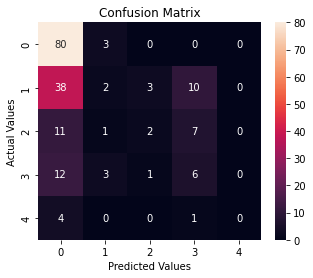

The fold is : 1 : 
              precision    recall  f1-score   support

           0       0.68      0.82      0.74        82
           1       0.30      0.45      0.36        53
           2       0.00      0.00      0.00        22
           3       0.25      0.05      0.08        22
           4       0.00      0.00      0.00         5

    accuracy                           0.50       184
   macro avg       0.24      0.26      0.24       184
weighted avg       0.42      0.50      0.44       184



c:\Users\irem\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\irem\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\irem\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

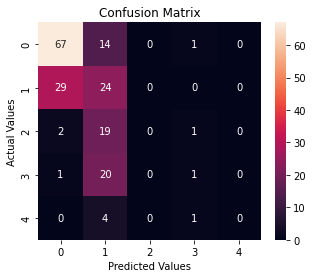

The fold is : 2 : 
              precision    recall  f1-score   support

           0       0.80      0.96      0.87        82
           1       0.46      0.74      0.57        53
           2       0.00      0.00      0.00        22
           3       0.00      0.00      0.00        21
           4       0.00      0.00      0.00         6

    accuracy                           0.64       184
   macro avg       0.25      0.34      0.29       184
weighted avg       0.49      0.64      0.55       184



c:\Users\irem\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\irem\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\irem\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

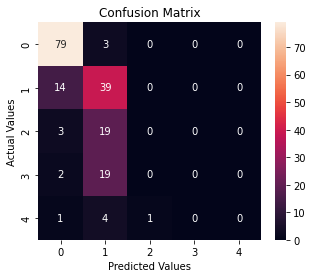

The fold is : 3 : 
              precision    recall  f1-score   support

           0       0.72      0.91      0.81        82
           1       0.18      0.11      0.14        53
           2       0.21      0.14      0.17        22
           3       0.12      0.19      0.15        21
           4       0.00      0.00      0.00         6

    accuracy                           0.48       184
   macro avg       0.25      0.27      0.25       184
weighted avg       0.41      0.48      0.44       184



c:\Users\irem\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\irem\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\irem\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

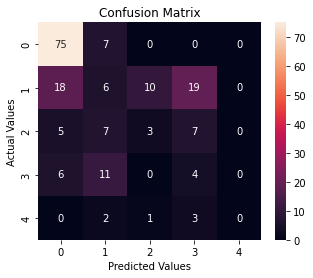

The fold is : 4 : 
              precision    recall  f1-score   support

           0       1.00      0.21      0.34        82
           1       0.20      0.15      0.17        53
           2       0.13      0.32      0.18        22
           3       0.15      0.52      0.23        21
           4       0.00      0.00      0.00         6

    accuracy                           0.23       184
   macro avg       0.30      0.24      0.19       184
weighted avg       0.54      0.23      0.25       184



c:\Users\irem\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\irem\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\irem\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

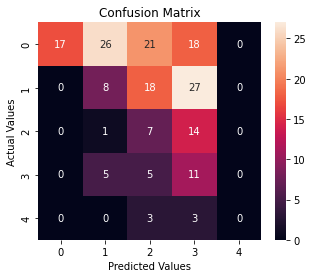

In [3401]:
from sklearn.svm import SVC

acc_svm_poly=[]
kf=model_selection.StratifiedKFold(n_splits=5)

for fold , (trn_,val_) in enumerate(kf.split(X=df,y=y)):
    
    X_train=df.loc[trn_,feature_col]
    y_train=df.loc[trn_,target]
    
    X_valid=df.loc[val_,feature_col]
    y_valid=df.loc[val_,target]
    
    ro_scaler=MinMaxScaler()
    X_train=ro_scaler.fit_transform(X_train)
    X_valid=ro_scaler.transform(X_valid)
    
    clf=SVC(kernel="rbf", decision_function_shape = "ovo")
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_valid)
    print(f"The fold is : {fold} : ")
    print(classification_report(y_valid,y_pred))

    cm = confusion_matrix(y_valid, y_pred)
    cm_df = pd.DataFrame(cm, index = [0, 1, 2, 3, 4], columns = [0, 1, 2, 3, 4])

    plt.figure(figsize=(5,4))
    sns.heatmap(cm_df, annot=True)
    plt.title('Confusion Matrix')
    plt.ylabel('Actual Values')
    plt.xlabel('Predicted Values')
    plt.show()

    confusion_matrix(y_valid, y_pred)
   

The fold is : 0 : 
              precision    recall  f1-score   support

           0       0.58      0.92      0.71        83
           1       0.37      0.28      0.32        53
           2       0.00      0.00      0.00        21
           3       0.17      0.09      0.12        22
           4       0.00      0.00      0.00         5

    accuracy                           0.51       184
   macro avg       0.22      0.26      0.23       184
weighted avg       0.39      0.51      0.43       184



c:\Users\irem\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\irem\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\irem\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

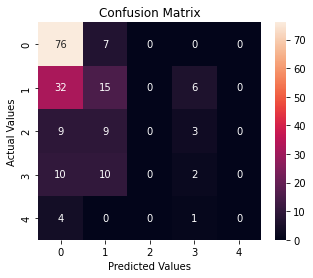

The fold is : 1 : 
              precision    recall  f1-score   support

           0       0.64      0.89      0.74        82
           1       0.35      0.45      0.40        53
           2       0.50      0.05      0.08        22
           3       0.00      0.00      0.00        22
           4       0.00      0.00      0.00         5

    accuracy                           0.53       184
   macro avg       0.30      0.28      0.24       184
weighted avg       0.45      0.53      0.46       184



c:\Users\irem\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\irem\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\irem\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

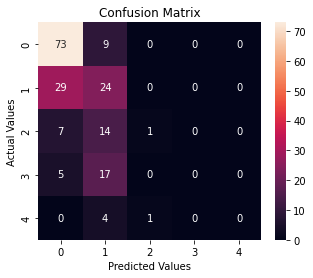

The fold is : 2 : 
              precision    recall  f1-score   support

           0       0.76      0.89      0.82        82
           1       0.44      0.72      0.54        53
           2       0.00      0.00      0.00        22
           3       0.00      0.00      0.00        21
           4       0.00      0.00      0.00         6

    accuracy                           0.60       184
   macro avg       0.24      0.32      0.27       184
weighted avg       0.46      0.60      0.52       184



c:\Users\irem\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\irem\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\irem\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

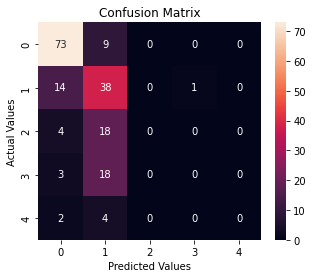

The fold is : 3 : 
              precision    recall  f1-score   support

           0       0.68      0.84      0.75        82
           1       0.29      0.26      0.27        53
           2       0.22      0.23      0.22        22
           3       0.00      0.00      0.00        21
           4       0.00      0.00      0.00         6

    accuracy                           0.48       184
   macro avg       0.24      0.27      0.25       184
weighted avg       0.41      0.48      0.44       184



c:\Users\irem\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\irem\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\irem\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

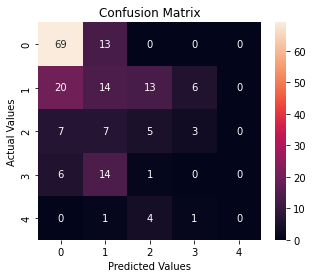

The fold is : 4 : 
              precision    recall  f1-score   support

           0       0.75      0.40      0.52        82
           1       0.34      0.45      0.39        53
           2       0.12      0.14      0.13        22
           3       0.11      0.24      0.15        21
           4       0.00      0.00      0.00         6

    accuracy                           0.35       184
   macro avg       0.26      0.25      0.24       184
weighted avg       0.46      0.35      0.38       184



c:\Users\irem\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\irem\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\irem\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

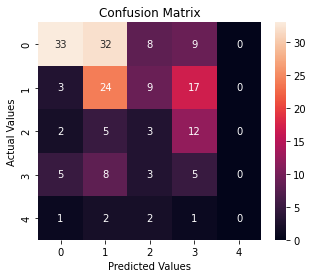

In [3402]:
acc_knn_poly=[]
kf=model_selection.StratifiedKFold(n_splits=5)

for fold , (trn_,val_) in enumerate(kf.split(X=df,y=y)):
    
    X_train=df.loc[trn_,feature_col]
    y_train=df.loc[trn_,target]
    
    X_valid=df.loc[val_,feature_col]
    y_valid=df.loc[val_,target]
    
    ro_scaler=MinMaxScaler()
    X_train=ro_scaler.fit_transform(X_train)
    X_valid=ro_scaler.transform(X_valid)
    
    knn_model = KNeighborsClassifier(n_neighbors=15, p=2, metric='euclidean')
    knn_model.fit(X_train, y_train)
    #y_preds = knn_model.predict(X_test)

    knn_mod = knn_model.fit(X_train, y_train)
    knn_mod.predict(X_train)
    y_pred = knn_mod.predict(X_valid)
    print(f"The fold is : {fold} : ")
    print(classification_report(y_valid,y_pred))

    cm = confusion_matrix(y_valid, y_pred)
    cm_df = pd.DataFrame(cm, index = [0, 1, 2, 3, 4], columns = [0, 1, 2, 3, 4])

    plt.figure(figsize=(5,4))
    sns.heatmap(cm_df, annot=True)
    plt.title('Confusion Matrix')
    plt.ylabel('Actual Values')
    plt.xlabel('Predicted Values')
    plt.show()

    confusion_matrix(y_valid, y_pred)

In [3403]:
from sklearn.model_selection import StratifiedKFold

model = KNeighborsClassifier(n_neighbors=15, p=2, metric='euclidean')
sk_fold = StratifiedKFold(n_splits=5)
mod_score_skfold = cross_val_score(model,x,y,cv=sk_fold)
print(np.mean(mod_score_skfold))
print(mod_score_skfold)

0.41630434782608694
[0.47282609 0.45652174 0.45108696 0.35326087 0.34782609]


In [3404]:
from sklearn import tree
score = cross_val_score(tree.DecisionTreeClassifier(random_state= 42), x, y, cv= skf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.3f}".format(score.mean())}')

from sklearn import ensemble
score = cross_val_score(ensemble.RandomForestClassifier(random_state= 42), x, y, cv= skf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.3f}".format(score.mean())}')

knn = KNeighborsClassifier(n_neighbors = 15)
scores = cross_val_score(knn, x, y, cv= skf, scoring= "accuracy")
print(scores)
print(f'Average score: {"{:.3f}".format(score.mean())}')

Scores for each fold are: [0.5326087  0.54891304 0.52173913 0.44565217 0.50543478]
Average score: 0.511
Scores for each fold are: [0.64130435 0.55434783 0.56521739 0.54891304 0.57608696]
Average score: 0.577
[0.54891304 0.49456522 0.5        0.47282609 0.45652174]
Average score: 0.577
